In [1]:
import numpy as np
import scipy.stats
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance
import scipy.stats
from utils import product_of_gaussians, gibbs_sampler_for_binary_tree,  W2_distance, gibbs_sampler_for_circle,decent_LMC_binary_tree

In [15]:
# ablation study on n, perfect binnary tree
num_iterations = 40
num_samples = 100
num_dimensions = 5
num_seeds = 5

W2s = np.zeros([num_seeds, 4, num_iterations])
slopes = np.zeros([num_seeds,4])
min_W2 = np.zeros([num_seeds,4])
for seed in range(num_seeds):
    np.random.seed(seed)
    for num_layers in [3,4,5,6]:
        eta = 0.05
        num_distributions = 2 ** num_layers - 1
        means = [1 + np.zeros(num_dimensions) for _ in range(num_distributions)]
        covariances = [np.identity(num_dimensions) for _ in range(num_distributions)]
        overall_mean, overall_cov = product_of_gaussians(means,covariances)
        final_samples = np.zeros([num_iterations,num_samples, num_dimensions])
        for sample_index in range(num_samples):
            samples = gibbs_sampler_for_binary_tree(num_dimensions, num_iterations, num_layers, means, covariances, eta)
            final_samples[:,sample_index,:] = samples[:,0,:]
        w2s_temp = []
        for iteraion_index in range(num_iterations):
            current_samples = final_samples[iteraion_index, :,:]
            # estimate the mean here
            emMean = np.mean(current_samples, axis = 0)
            emCov = EmpiricalCovariance(assume_centered=False).fit(current_samples).covariance_
            w2s_temp.append(W2_distance(emMean, emCov, overall_mean,overall_cov) )
        W2s[seed,int(num_layers-3),:] = w2s_temp
        slope, intercept = np.polyfit( list(range(len(w2s_temp))), np.log(w2s_temp), 1)
        slopes[seed,int(num_layers-3)] = slope
        min_W2[seed,int(num_layers-3)] = min(w2s_temp)

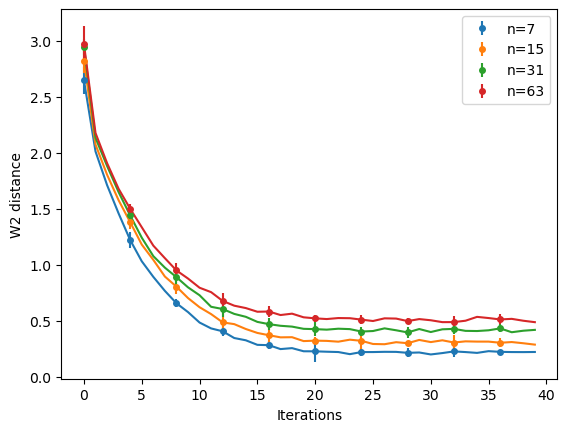

layers:3, mean_slope:-0.054207375686434224
layers:3, 2_std_slope:0.002789704123399596
layers:4, mean_slope:-0.04693504718711302
layers:4, 2_std_slope:0.0016822347334399473
layers:5, mean_slope:-0.039072135156919166
layers:5, 2_std_slope:0.002278547485886301
layers:6, mean_slope:-0.03416172134762508
layers:6, 2_std_slope:0.0011947449202341176
layers:3, mean_min_W2:0.16955548719127891
layers:3, 2_std_min_W2:0.043259435413363106
layers:4, mean_min_W2:0.2701785054893898
layers:4, 2_std_min_W2:0.0202612873418887
layers:5, mean_min_W2:0.3761939924206677
layers:5, 2_std_min_W2:0.024372434395941233
layers:6, mean_min_W2:0.4570046355049827
layers:6, 2_std_min_W2:0.034940463752629436


In [20]:
np.save('w2s_tree_Gibbs.npy',W2s)
mean_W2s = np.mean(W2s, axis=0)
std_W2s = np.std(W2s, axis=0)
index = np.arange(0, num_iterations, 4)
for layer in [3,4,5,6]:
    num_nodes = 2 ** layer -1
    line, = plt.plot(mean_W2s[int(layer-3),:])
    plt.errorbar(index, mean_W2s[int(layer-3),index], 
                 yerr=2*std_W2s[int(layer-3),index], label=f'n={num_nodes}', fmt='o', color = line.get_color(),markersize=4)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('W2 distance')
plt.savefig('tree_Gibbs.pdf')
plt.show()
plt.close()

mean_slope = np.mean(slopes, axis=0)
std_slope = np.std(slopes, axis=0)
for i in range(len(mean_slope)):
    print(f'layers:{int(i+3)}, mean_slope:{mean_slope[i]}')
    print(f'layers:{int(i+3)}, 2_std_slope:{2*std_slope[i]}')
    
mean_min_W2 = np.mean(min_W2, axis=0)
std_min_W2 = np.std(min_W2, axis=0)
for i in range(len(mean_min_W2)):
    print(f'layers:{int(i+3)}, mean_min_W2:{mean_min_W2[i]}')
    print(f'layers:{int(i+3)}, 2_std_min_W2:{2*std_min_W2[i]}')
  


In [2]:
# ablation study on n, circle
num_iterations = 40
num_samples = 100
num_dimensions = 5
num_seeds = 5

W2s = np.zeros([num_seeds, 4, num_iterations])
slopes = np.zeros([num_seeds,4])
min_W2 = np.zeros([num_seeds,4])
for seed in range(num_seeds):
    np.random.seed(seed)
    for num_distributions in [7,15,31,63]:
        eta = 0.05
        means = [1 + np.zeros(num_dimensions) for _ in range(num_distributions)]
        covariances = [np.identity(num_dimensions) for _ in range(num_distributions)]
        overall_mean, overall_cov = product_of_gaussians(means,covariances)
        final_samples = np.zeros([num_iterations,num_samples, num_dimensions])
        for sample_index in range(num_samples):
            samples = gibbs_sampler_for_circle(num_dimensions, num_iterations, num_distributions, means, covariances, eta)
            final_samples[:,sample_index,:] = samples[:,0,:]
        w2s_temp = []
        for iteraion_index in range(num_iterations):
            current_samples = final_samples[iteraion_index, :,:]
            # estimate the mean here
            emMean = np.mean(current_samples, axis = 0)
            emCov = EmpiricalCovariance(assume_centered=False).fit(current_samples).covariance_
            w2s_temp.append(W2_distance(emMean, emCov, overall_mean,overall_cov) )
        index_nodes = int(np.log2(num_distributions+1)-3)
        W2s[seed,index_nodes,:] = w2s_temp
        slope, intercept = np.polyfit( list(range(len(w2s_temp))), np.log(w2s_temp), 1)
        slopes[seed,index_nodes] = slope
        min_W2[seed,index_nodes] = min(w2s_temp)

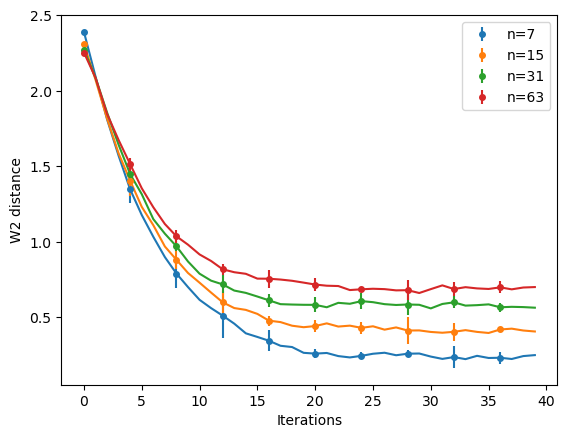

n:7, mean_slope:-0.055513334244609344
n:7, 2_std_slope:0.0034844437576471545
n:15, mean_slope:-0.03821619539332818
n:15, 2_std_slope:0.002169520739969887
n:31, mean_slope:-0.028231645888084318
n:31, 2_std_slope:0.001180096037509915
n:63, mean_slope:-0.024009798358559063
n:63, 2_std_slope:0.001466102431959358
n:3, mean_min_W2:0.18670237882196866
n:3, 2_std_min_W2:0.013309360969863874
n:4, mean_min_W2:0.36765828374269804
n:4, 2_std_min_W2:0.016348563351863767
n:5, mean_min_W2:0.5258102519540832
n:5, 2_std_min_W2:0.015353615323600744
n:6, mean_min_W2:0.6366829085168216
n:6, 2_std_min_W2:0.024840430089924197


In [3]:
np.save('w2s_circle_Gibbs.npy',W2s)
mean_W2s = np.mean(W2s, axis=0)
std_W2s = np.std(W2s, axis=0)
index = np.arange(0, num_iterations, 4)
for index_nodes, num_nodes in enumerate([7,15,31,63]):
    line, = plt.plot(mean_W2s[index_nodes,:])
    plt.errorbar(index, mean_W2s[index_nodes,index], 
                 yerr=2*std_W2s[index_nodes,index], label=f'n={num_nodes}', fmt='o', color = line.get_color(),markersize=4)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('W2 distance')
plt.savefig('circle_Gibbs.pdf')
plt.show()
plt.close()

mean_slope = np.mean(slopes, axis=0)
std_slope = np.std(slopes, axis=0)
for i in range(len(mean_slope)):
    n = 2 ** (i+3)-1
    print(f'n:{int(n)}, mean_slope:{mean_slope[i]}')
    print(f'n:{int(n)}, 2_std_slope:{2*std_slope[i]}')
    
mean_min_W2 = np.mean(min_W2, axis=0)
std_min_W2 = np.std(min_W2, axis=0)
for i in range(len(mean_min_W2)):
    n = 2 ** (i+3)-1
    print(f'n:{int(i+3)}, mean_min_W2:{mean_min_W2[i]}')
    print(f'n:{int(i+3)}, 2_std_min_W2:{2*std_min_W2[i]}')

In [2]:
# Compare with DELMC on binary tree
num_iterations = 100
num_samples = 100
num_dimensions = 5
num_seeds = 5
num_layers = 3

W2s_LMC = np.zeros([num_seeds, 3, num_iterations])
W2s_Gibbs = np.zeros([num_seeds, 3, num_iterations])
slopes = np.zeros([num_seeds,3])
min_W2 = np.zeros([num_seeds,3])
for seed in range(num_seeds):
    np.random.seed(seed)
    for index_eta, eta in enumerate([0.5,0.1,0.01]):
        num_distributions = 2 ** num_layers - 1
        means = [1 + np.zeros(num_dimensions) for _ in range(num_distributions)]
        covariances = [np.identity(num_dimensions) for _ in range(num_distributions)]
        overall_mean, overall_cov = product_of_gaussians(means,covariances)
        final_samples_LMC = np.zeros([num_iterations,num_samples, num_dimensions])
        final_samples_Gibbs = np.zeros([num_iterations,num_samples, num_dimensions])
        for sample_index in range(num_samples):
            samples_LMC = decent_LMC_binary_tree(num_dimensions, num_iterations, num_layers, means, covariances, eta)
            samples_Gibbs = gibbs_sampler_for_binary_tree(num_dimensions, num_iterations, num_layers, means, covariances, eta)
            final_samples_Gibbs[:,sample_index,:] = samples_Gibbs[:,0,:]
            final_samples_LMC[:,sample_index,:] = samples_LMC[:,0,:]
        w2s_temp = []
        for iteraion_index in range(num_iterations):
            current_samples = final_samples_LMC[iteraion_index, :,:]
            emMean = np.mean(current_samples, axis = 0)
            emCov = EmpiricalCovariance(assume_centered=False).fit(current_samples).covariance_
            w2s_temp.append(W2_distance(emMean, emCov, overall_mean,overall_cov) )
        W2s_LMC[seed,index_eta,:] = w2s_temp   
        
        w2s_temp=  []
        for iteraion_index in range(num_iterations):
            current_samples = final_samples_Gibbs[iteraion_index, :,:]
            emMean = np.mean(current_samples, axis = 0)
            emCov = EmpiricalCovariance(assume_centered=False).fit(current_samples).covariance_
            w2s_temp.append(W2_distance(emMean, emCov, overall_mean,overall_cov) )
        W2s_Gibbs[seed,index_eta,:] = w2s_temp
        slope, intercept = np.polyfit( list(range(len(w2s_temp))), np.log(w2s_temp), 1)
        slopes[seed,index_eta] = slope
        min_W2[seed,index_eta] = min(w2s_temp)

/tmp/ipykernel_2938910/2105201520.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  W2s_LMC[seed,index_eta,:] = w2s_temp
/tmp/ipykernel_2938910/2105201520.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  W2s_Gibbs[seed,index_eta,:] = w2s_temp


TypeError: array type complex256 is unsupported in linalg

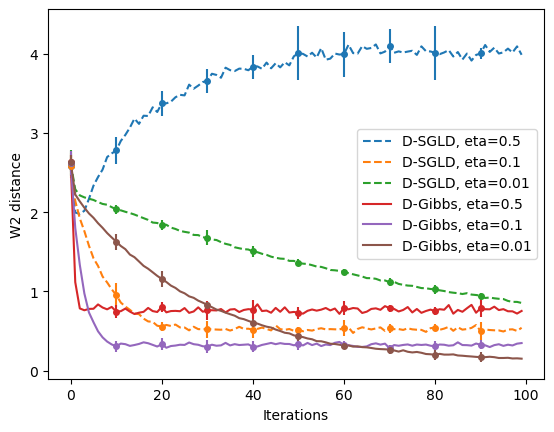

index_eta:0, mean_slope:-0.0009418317652391724
index_eta:0, 2_std_slope:0.0002944890464855443
index_eta:1, mean_slope:-0.004913119144156241
index_eta:1, 2_std_slope:0.0012293892522428345
index_eta:2, mean_slope:-0.02839551733043457
index_eta:2, 2_std_slope:0.0025366956979374572
index_eta:0, mean_min_W2:0.6281575815939727
index_eta:0, 2_std_min_W2:0.042491190915711546
index_eta:1, mean_min_W2:0.2426631089185563
index_eta:1, 2_std_min_W2:0.021289759688048904
index_eta:2, mean_min_W2:0.14091020513576097
index_eta:2, 2_std_min_W2:0.036951425301145965


In [ ]:
np.save('LMC_tree.npy',W2s_LMC)
np.save('Gibbs_tree.npy',W2s_Gibbs)

mean_W2s = np.mean(W2s_LMC, axis=0)
std_W2s = np.std(W2s_LMC, axis=0)
index = np.arange(0, num_iterations, 10)
for index_eta, eta in enumerate([0.5,0.1,0.01]):
    line, = plt.plot(mean_W2s[index_eta,:],linestyle='dashed', label=f'D-SGLD, eta={eta}')
    plt.errorbar(index, mean_W2s[index_eta,index], 
                yerr=2*std_W2s[index_eta,index], fmt='o', color = line.get_color(),markersize=4)
    
mean_W2s = np.mean(W2s_Gibbs, axis=0)
std_W2s = np.std(W2s_Gibbs, axis=0)
index = np.arange(0, num_iterations, 10)
for index_eta, eta in enumerate([0.5,0.1,0.01]):
    line, = plt.plot(mean_W2s[index_eta,:],label=f'D-Gibbs, eta={eta}')
    plt.errorbar(index, mean_W2s[index_eta,index], 
                yerr=2*std_W2s[index_eta,index], fmt='o', color = line.get_color(),markersize=4)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('W2 distance')
plt.savefig('tree_both.pdf')
plt.show()
plt.close()

mean_slope = np.mean(slopes, axis=0)
std_slope = np.std(slopes, axis=0)
for i in range(len(mean_slope)):
    print(f'index_eta:{(i)}, mean_slope:{mean_slope[i]}')
    print(f'index_eta:{(i)}, 2_std_slope:{2*std_slope[i]}')
    
mean_min_W2 = np.mean(min_W2, axis=0)
std_min_W2 = np.std(min_W2, axis=0)
for i in range(len(mean_min_W2)):
    print(f'index_eta:{i}, mean_min_W2:{mean_min_W2[i]}')
    print(f'index_eta:{i}, 2_std_min_W2:{2*std_min_W2[i]}')

In [18]:
# Compare with DELMC on circle graph - no Gaussian
class f_x: # \exp(-\|x-\mu\|^{1+\alpha}) 
    
    def __init__(self, mu, alpha, num_dimensions, eta=1):
        self.mu = mu
        self.alpha = alpha
        self.num_dimensions = num_dimensions
        self.eta = 1
    def zero_order(self,x):
        norm = np.linalg.norm(x-self.mu, ord = 2)
        return norm**((1+self.alpha)) / self.eta/2
    def first_order(self, x):
        norm = np.linalg.norm(x-self.mu, ord = 2)
        return ((self.alpha+1)*norm**((self.alpha-1))*(x-self.mu) / self.eta)/2

def rejection_sample(f_xs, num_samples):
    dimension = f_xs[0].num_dimensions
    samples = []
    def zero_order(x):
        sum = 0
        for f_x in f_xs:
            sum += f_x.zero_order(x)
        return sum
    while len(samples) < num_samples:
        sample = np.random.multivariate_normal(np.ones(dimension), np.identity(dimension))
        if np.random.uniform(0,1) < np.exp(-zero_order(sample)) / np.exp(-np.linalg.norm(sample-np.ones(dimension), ord = 2)**2/2):
            samples.append(sample)
            print(len(samples)) if len(samples) % 1000 == 0 else None
    return np.array(samples)

def LMC(f_xs, num_samples):
    dimension = f_xs[0].num_dimensions
    epsilon = 0.01
    samples = []
    iterations = 1000
    def first_order(x):
        sum = 0
        for f_x in f_xs:
            sum += f_x.first_order(x)
        return sum
    for sample_index in range(num_samples):
        Gaussians = np.random.multivariate_normal(np.zeros(dimension), np.identity(dimension), iterations+1)
        sample = Gaussians[-1,:]
        for i in range(iterations):
            sample = sample - epsilon * first_order(sample) +  Gaussians[i,:] * np.sqrt(2*epsilon)
        samples.append(sample)
        print(len(samples)) if len(samples) % 100 == 0 else None
    return np.array(samples)


In [13]:
num_samples = 1
num_dimensions = 1
num_seeds = 3
num_nodes = 4

means = np.linspace(0,1,num_nodes) 
means = [np.ones(num_dimensions) * mean for mean in means]
alphas = [0.5 for _ in range(num_nodes)]
f_xs = [f_x(means[i], alphas[i], num_dimensions) for i in range(num_nodes)]
# f_xs = [f_x(2,1,1),f_x(2,1,1),f_x(2,1,1)]
ground_truth = LMC(f_xs, num_samples=10000)
np.save('ground_truth_circle.npy',ground_truth) 
# true_ones = np.random.multivariate_normal(2+np.zeros(num_dimensions), 1/3* np.identity(dimension), 10000)
# plt.hist(ground_truth, bins=30, edgecolor='black', density=True)
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.grid(True)
# plt.show()  
    


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


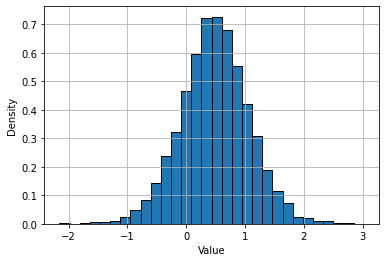

NameError: name 'true_ones' is not defined

In [15]:
plt.hist(ground_truth, bins=30, edgecolor='black', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [17]:
num_iterations = 1000
num_seeds = 1
mean_differences_steps = []
etas = [0.5,0.1,0.01]
for seed in range(num_seeds):
    np.random.seed(seed)
    for index_eta, eta in enumerate(etas):

        final_samples_LMC = np.zeros([num_iterations, num_nodes, num_dimensions])
        final_samples_Gibbs = np.zeros([num_iterations, num_nodes, num_dimensions])

        final_samples_Gibbs[0, :, :] = np.random.multivariate_normal(np.zeros(num_dimensions), np.identity(num_dimensions), size=num_nodes)

        for sample_index in range(num_iterations):
            if sample_index % 200 == 0:
                print(sample_index)
            for node_index in range(num_nodes):
                current_fxs = []
                if node_index == 0:
                    current_fxs.append(f_x(mu=final_samples_Gibbs[sample_index - 1, -1, :], alpha=1, num_dimensions=num_dimensions, eta=eta))
                    current_fxs.append(f_x(mu=final_samples_Gibbs[sample_index - 1, 1, :], alpha=1, num_dimensions=num_dimensions, eta=eta))
                elif node_index == num_nodes - 1:
                    current_fxs.append(f_x(mu=final_samples_Gibbs[sample_index, 0, :], alpha=1, num_dimensions=num_dimensions, eta=eta))
                    current_fxs.append(f_x(mu=final_samples_Gibbs[sample_index, node_index - 1, :], alpha=1, num_dimensions=num_dimensions, eta=eta))
                else:
                    current_fxs.append(f_x(mu=final_samples_Gibbs[sample_index - 1, node_index + 1, :], alpha=1, num_dimensions=num_dimensions, eta=eta))
                    current_fxs.append(f_x(mu=final_samples_Gibbs[sample_index, node_index - 1, :], alpha=1, num_dimensions=num_dimensions, eta=eta))

                current_fxs.append(f_xs[node_index])
                final_samples_Gibbs[sample_index, node_index, :] = LMC(current_fxs, 1)
        np.save(f'Gibbs_circle_{seed}_{index_eta}.npy',final_samples_Gibbs)
        mean_diffs = []
        for step in range(200, num_iterations, 100):
            last_samples_Gibbs = final_samples_Gibbs[100:step, -1, :].reshape(-1, num_dimensions)
            difference = np.mean(last_samples_Gibbs, axis = 0) - np.mean(ground_truth, axis=0)
            mean_diff = np.dot(difference,difference)  /num_dimensions
            mean_diffs.append(mean_diff)
        
        mean_differences_steps.append(mean_diffs)

# Average the mean differences across seeds
mean_differences_steps = np.array(mean_differences_steps).reshape(num_seeds, len(etas), -1).mean(axis=0)

# Plot the mean differences vs steps for each eta
steps_range = range(200, num_iterations, 100)
for index_eta, eta in enumerate(etas):
    plt.plot(steps_range, mean_differences_steps[index_eta], marker='o', label=f'eta={eta}')

plt.xlabel('Steps')
plt.ylabel('Mean Difference')
plt.title('Difference of the Mean vs Steps for Each Eta Setting')
plt.legend()
plt.grid(True)
plt.show()

# np.save('LMC_tree.npy',W2s_LMC)
# np.save('Gibbs_tree.npy',W2s_Gibbs)

# mean_W2s = np.mean(W2s_LMC, axis=0)
# std_W2s = np.std(W2s_LMC, axis=0)
# index = np.arange(0, num_iterations, 10)
# for index_eta, eta in enumerate([0.5,0.1,0.01]):
#     line, = plt.plot(mean_W2s[index_eta,:],linestyle='dashed', label=f'D-SGLD, eta={eta}')
#     plt.errorbar(index, mean_W2s[index_eta,index], 
#                 yerr=2*std_W2s[index_eta,index], fmt='o', color = line.get_color(),markersize=4)
    
# mean_W2s = np.mean(W2s_Gibbs, axis=0)
# std_W2s = np.std(W2s_Gibbs, axis=0)
# index = np.arange(0, num_iterations, 10)
# for index_eta, eta in enumerate([0.5,0.1,0.01]):
#     line, = plt.plot(mean_W2s[index_eta,:],label=f'D-Gibbs, eta={eta}')
#     plt.errorbar(index, mean_W2s[index_eta,index], 
#                 yerr=2*std_W2s[index_eta,index], fmt='o', color = line.get_color(),markersize=4)
# plt.legend()
# plt.xlabel('Iterations')
# plt.ylabel('W2 distance')
# plt.savefig('tree_both.pdf')
# plt.show()
# plt.close()

# mean_slope = np.mean(slopes, axis=0)
# std_slope = np.std(slopes, axis=0)
# for i in range(len(mean_slope)):
#     print(f'index_eta:{(i)}, mean_slope:{mean_slope[i]}')
#     print(f'index_eta:{(i)}, 2_std_slope:{2*std_slope[i]}')
    
# mean_min_W2 = np.mean(min_W2, axis=0)
# std_min_W2 = np.std(min_W2, axis=0)
# for i in range(len(mean_min_W2)):
#     print(f'index_eta:{i}, mean_min_W2:{mean_min_W2[i]}')
#     print(f'index_eta:{i}, 2_std_min_W2:{2*std_min_W2[i]}')

0


KeyboardInterrupt: 

In [136]:
final_samples_Gibbs



array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]])

In [33]:
last_samples_Gibbs

array([[-0.64958872],
       [-0.58003519],
       [-0.18595737],
       [-0.18245695]])